# Customer Life Value Analysis

## Objectives:
1. Visualizing the distribution of Acquisition cost and revenue generated by customer using histogram
2. Create a visualization for the revenue generated by the customer
3. Compare the cost of Acquisition by different channels and identify the most and least profitable channels
4. Find out which channels are most and least effective at converting customers
5. Calculate the total revenue by channels and analyze the most and least profitable channels in terms of generating revenue
6.  Calculate the return on investment(ROI) for each channels

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default ="plotly_white"


In [2]:
# load the data
data = pd.read_csv("customer_acquisition_data.csv")
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


## Visualizing the distribution of Acquisition cost and revenue generated by customer using histogram

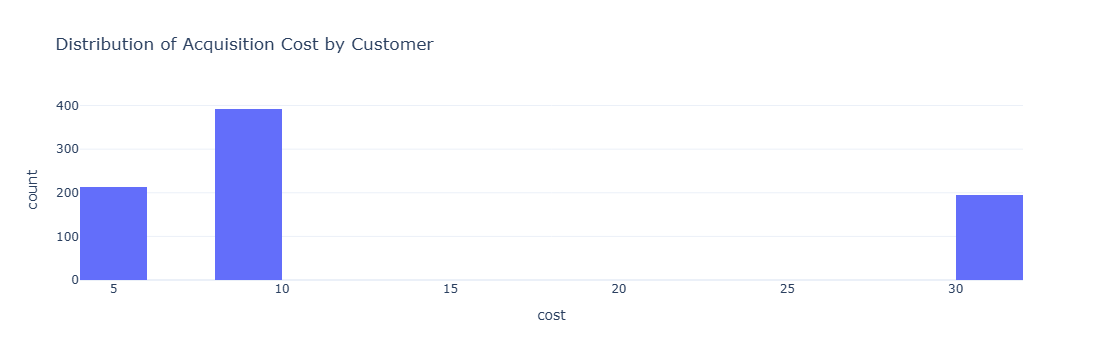

In [34]:
fig = px.histogram(data, x='cost', nbins=20, title='Distribution of Acquisition Cost by Customer')
fig.show()

## Create a visualization for the revenue generated by the customer 

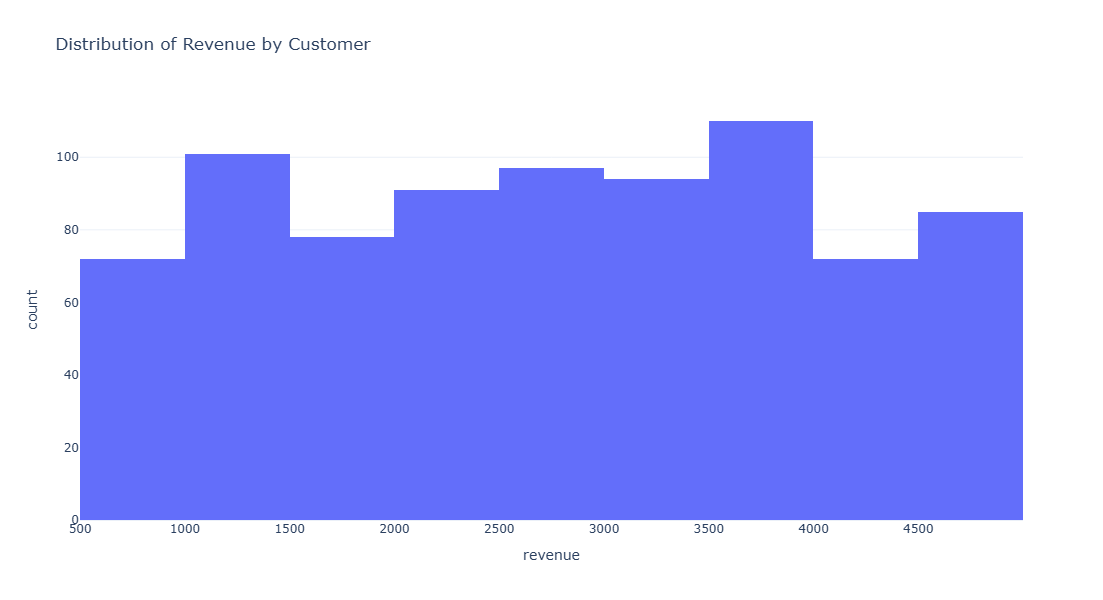

In [35]:
import plotly.express as px

fig = px.histogram(data, x='revenue', nbins=20, title='Distribution of Revenue by Customer')

# Set figure size
fig.update_layout(height=600, width=800)

fig.show()

## Compare the cost of Acquisition by different channels and identify the most and least profitable channels

In [3]:
Acquisition_cost = data.groupby('channel')['cost'].mean().reset_index()
Acquisition_cost

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


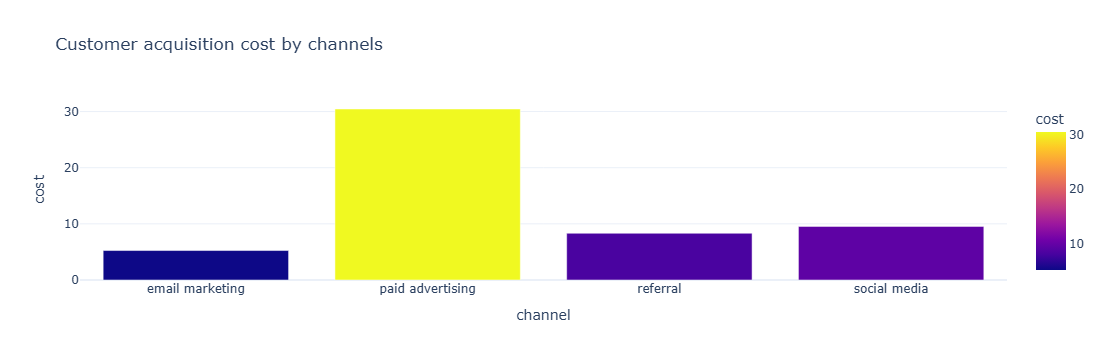

In [36]:
fig = px.bar(Acquisition_cost, x='channel', y='cost', title='Customer acquisition cost by channels', color='cost')
fig.show()

## Find out which channels are most and least effective at converting customers

In [39]:
Cutomer_Acquisition_rate = data.groupby('channel')['conversion_rate'].mean().reset_index()
Cutomer_Acquisition_rate

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


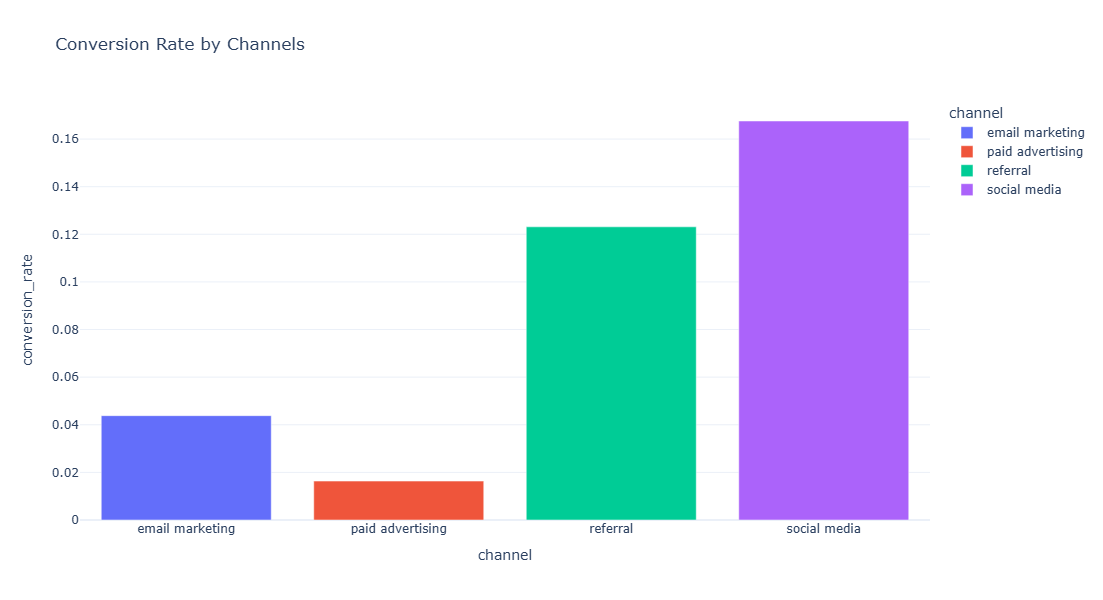

In [38]:
import plotly.express as px

fig = px.bar(
    Cutomer_Acquisition_rate,
    x='channel',
    y='conversion_rate',
    title='Conversion Rate by Channels',
    color='channel'
)

# set figure size (height & width)
fig.update_layout(height=600)

fig.show()



## Calculate the total revenue by channels and analyze the most and least profitable channels in terms of generating revenue

In [17]:
Revenue_by_channels = data.groupby('channel')['revenue'].mean().reset_index()
Revenue_by_channels

,channel,revenue
0,email marketing,2825.728972
1,paid advertising,2826.783505
2,referral,2751.458937
3,social media,2663.064865


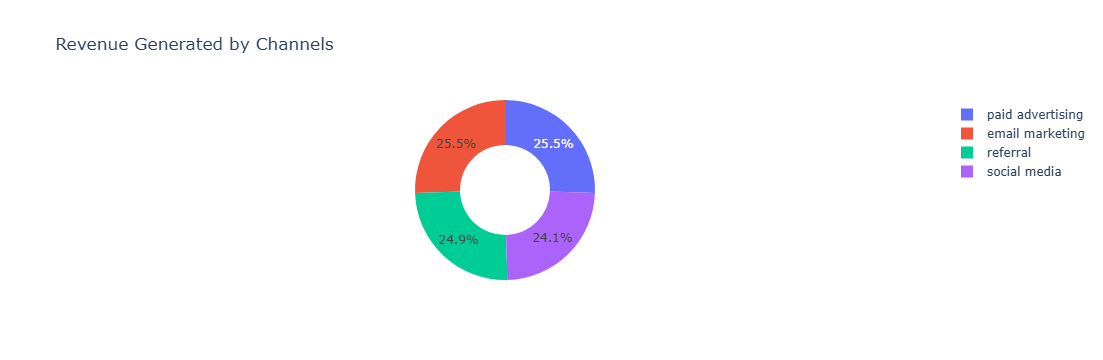

In [30]:
import plotly.express as px

fig = px.pie(
    Revenue_by_channels,
    values='revenue',
    names='channel',hole=0.5,
    title='Revenue Generated by Channels'
)



fig.show()



## Calculate the return on investment(ROI) for each channels

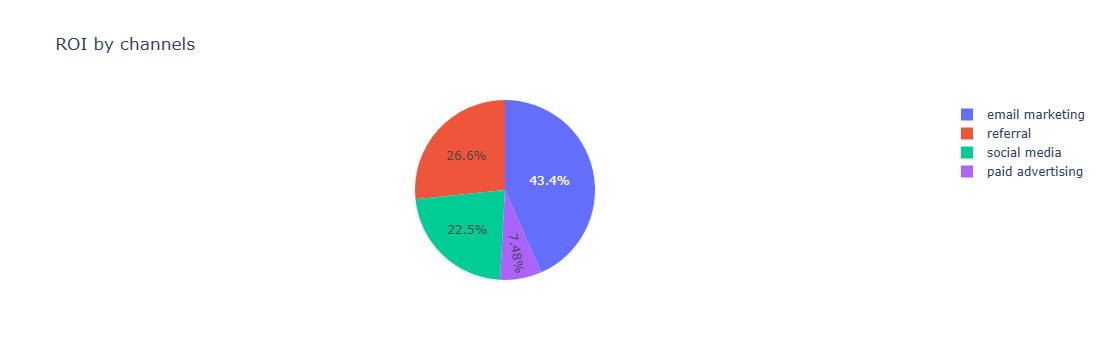

In [33]:
data['roi']=data['revenue']/data['cost']
roi_by_channels = data.groupby('channel')['roi'].mean().reset_index()
fig=px.pie(roi_by_channels, names='channel', values='roi', title= 'ROI by channels')
fig.show()